In [1]:
import pandas as pd

In [9]:
df_data = pd.read_csv('/Volumes/HooToo/2021 01-29 L929 binding under flow/2021 01-29 L929 sfip_blue Lsel_red.csv')
df_map = pd.read_csv('/Volumes/HooToo/2021 01-29 L929 binding under flow/map.csv')

In [10]:
df_data['col']=[int(x[0]) for x in df_data['column']]
df_data['fld']=[int(x[2:]) for x in df_data['column']]
df_data = df_data.merge(df_map,how='inner',on='col')
df_data

,column,color,count,col,fld,on,off
0,1_1,red,59,1,1,25,100
1,1_1,red,82,1,1,25,100
2,1_2,red,87,1,2,25,100
3,1_3,red,79,1,3,25,100
4,1_4,red,99,1,4,25,100
...,...,...,...,...,...,...,...
147,6_9,blue,1,6,9,50,200
148,6_11,blue,0,6,11,50,200
149,6_12,blue,3,6,12,50,200
150,6_13,blue,1,6,13,50,200


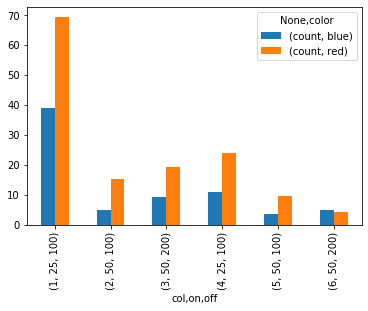

In [35]:
df_bycol = df_data.groupby(['col','color','on','off']).agg({'count':'mean'})
df_bycol.unstack(level='color').plot.bar()

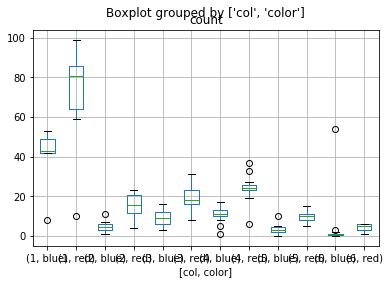

In [41]:
df_data.boxplot(column=['count'],by=['col','color'])

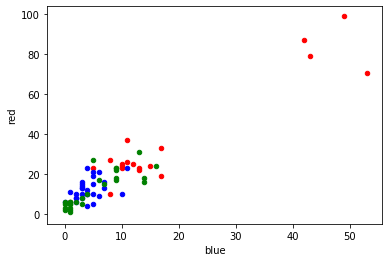

In [115]:

dfg = pd.pivot_table(df_data,index=['col','fld','on','off'],columns='color',values='count',aggfunc='mean').reset_index()
dfg['plotcolor']=''
dc = {'25100':'r','50100':'b','50200':'g'}
dfg['plotcolor']=[str(x)+'_'+str(y) for x,y in zip(dfg['on'].values,dfg['off'].values)]
dfg
#dfg.plot.scatter('blue','red',c='plotcolor')
ax = dfg.loc[(dfg['on']==25) & (dfg['off']==100)].plot.scatter('blue','red',c='r')
dfg.loc[(dfg['on']==50) & (dfg['off']==100)].plot.scatter('blue','red',c='b',ax=ax)
dfg.loc[(dfg['on']==50) & (dfg['off']==200)].plot.scatter('blue','red',c='g',ax=ax)
#dfg[dfg['on']==50].plot.scatter('blue','red',c='b')
#dfg[dfg['on']==25].plot.scatter('blue','red',c='r')

In [89]:
dfg = df_data.set_index(['col','fld','on','off','color','column'])
dfg.stack()

col  fld  on  off  color  column       
1    1    25  100  red    1_1     count    59
                                  count    82
     2    25  100  red    1_2     count    87
     3    25  100  red    1_3     count    79
     4    25  100  red    1_4     count    99
                                           ..
6    9    50  200  blue   6_9     count     1
     11   50  200  blue   6_11    count     0
     12   50  200  blue   6_12    count     3
     13   50  200  blue   6_13    count     1
     14   50  200  blue   6_14    count     1
Length: 152, dtype: int64

In [22]:
df_bycondition = df_bycol.reset_index().groupby(['on','off','color']).agg({'count':['mean','std']})
df_bycondition

count           
                   mean        std
on off color                      
25 100 blue   24.964286  19.849498
       red    46.702381  32.005000
50 100 blue    4.230952   0.986582
       red    12.478571   4.070915
   200 blue    6.892857   3.080965
       red    11.722527  10.594946

In [108]:
for name,group in df_bycondition:
    print(group)

mean
std


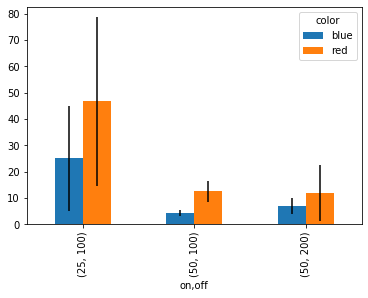

In [33]:

errors = df_bycondition['count']['std'].unstack(level='color')
df_bycondition['count']['mean'].unstack(level='color').plot.bar(yerr=errors)